In [3]:
# Activate environment in current directory
import Pkg;  
Pkg.activate(".");

# Run this once, to install necessary packages:
#Pkg.add(["ComplexMixtures", "PDBTools", "Plots", "LaTeXStrings"])

  Activating project at `~/mddf/1st_project_mddf`


In [4]:
# Load packages
using ComplexMixtures
using PDBTools
using Plots, Plots.Measures
using LaTeXStrings

In [5]:
# Default options for plots 
Plots.default(
    fontfamily="Computer Modern",
    linewidth=2,
    framestyle=:box,
    label=nothing,
    grid=false
)


In [6]:
# Load PDB file of the system
atoms1 = readPDB("./system_24trp-1ta.pdb")

   Vector{Atom{Nothing}} with 40617 atoms with fields:
   index name resname chain   resnum  residue        x        y        z occup  beta model segname index_pdb
       1   C1     TRP     X        1        1   35.440   66.070   45.050  1.00  0.00     1       X         1
       2   H1     TRP     X        1        1   36.380   66.580   45.140  1.00  0.00     1       X         2
       3   N1     TRP     X        1        1   35.430   64.690   45.030  1.00  0.00     1       X         3
                                                       ⋮ 
   40615   OW     SOL     X     3290    13290   40.520    6.160   70.870  1.00  0.00     1       X     40615
   40616  HW1     SOL     X     3290    13290   40.230    6.620   70.080  1.00  0.00     1       X     40616
   40617  HW2     SOL     X     3290    13290   40.510    6.830   71.560  1.00  0.00     1       X     40617

In [7]:
# Select the protein and the GLYC molecules
protein1 = select(atoms1, "resname TRP")
ta = select(atoms1, "resname TA5")
water = select(atoms1, "resname SOL")



   Vector{Atom{Nothing}} with 39795 atoms with fields:
   index name resname chain   resnum  residue        x        y        z occup  beta model segname index_pdb
     823   OW     SOL     X       26       26   39.950   26.330   27.980  1.00  0.00     1       X       823
     824  HW1     SOL     X       26       26   39.840   25.710   28.690  1.00  0.00     1       X       824
     825  HW2     SOL     X       26       26   39.960   27.190   28.410  1.00  0.00     1       X       825
                                                       ⋮ 
   40615   OW     SOL     X     3290    13290   40.520    6.160   70.870  1.00  0.00     1       X     40615
   40616  HW1     SOL     X     3290    13290   40.230    6.620   70.080  1.00  0.00     1       X     40616
   40617  HW2     SOL     X     3290    13290   40.510    6.830   71.560  1.00  0.00     1       X     40617

In [ ]:
# Setup solute and solvent structures
solute = AtomSelection(protein1, nmols=24)
cosolute = AtomSelection(ta, nmols=1)
solvent_h2o = AtomSelection(water, nmols=13265)

AtomSelection 
    39795 atoms belonging to 13265 molecule(s).
    Atoms per molecule: 3
    Number of groups: 3

In [9]:
# Path to the trajectory file
trajectory_file1 = "./traj_resp-24trp-1ta.dcd"

"./traj_resp-24trp-1ta.dcd"

In [10]:
# Run mddf calculation, and save results
trajectory2 = Trajectory(trajectory_file1, cosolute, solute)
results3 = mddf(trajectory2, Options(bulk_range=(10.0, 20.0)))
save(results3, "trp-ta_resp.json")
println("Results saved to trp-ta_results.json")


--------------------------------------------------------------------------------
Initializing data structures ...
Open trajectory and read first frame ...
 
--------------------------------------------------------------------------------
Starting MDDF calculation in parallel:
10001 frames will be considered.
Number of calculation threads: 8
Solute: 174 atoms belonging to 1 molecule.
Solvent: 648 atoms belonging to 24 molecules.


Progress: 100%|█████████████████████████████████████████| Time: 0:07:49
┌ Warning: 
│ 
│     Ideal-gas histogram bins with zero samples. 
│     Increase n_random_samples, number of trajectory frames, and/or bin size.
│ 
└ @ ComplexMixtures


--------------------------------------------------------------------------------
Results saved to trp-ta_results.json


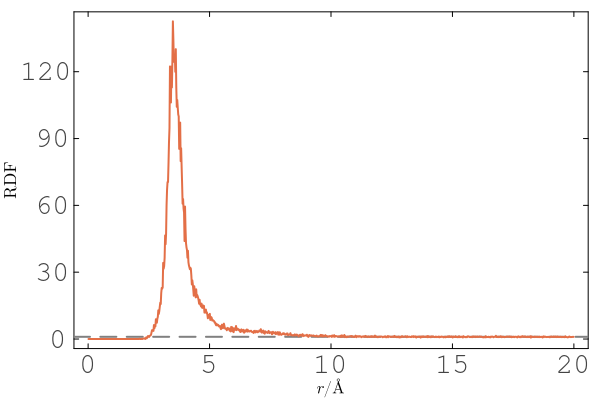

GKS: could not find font bold.ttf


In [11]:
plot(layout=(1, 1))
hline!([1], linestyle=:dash, linecolor=:gray, subplot=1)

# plot rdf
plot!(results3.d, results3.rdf,
    xlabel=L"r/\AA",
    ylabel="RDF",
    tickfont=font(15, "Arial",:bold),
    subplot=1
)

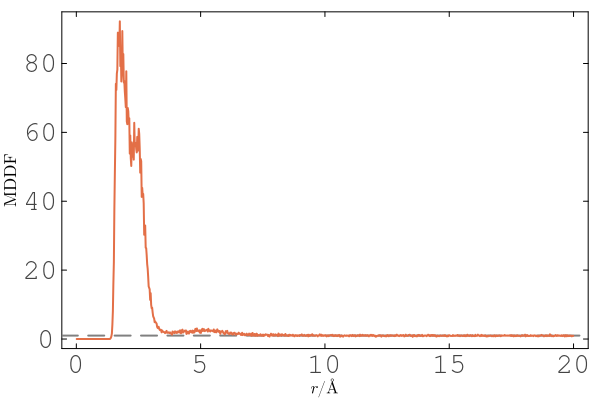

In [12]:
plot(layout=(1, 1))
hline!([1], linestyle=:dash, linecolor=:gray, subplot=1)

# plot mddf
plot!(results3.d, results3.mddf,
    xlabel=L"r/\AA",
    ylabel="MDDF",
    tickfont=font(15, "Arial",:bold),
    subplot=1
)

In [13]:
# 
# Load PDB file of the system
atoms_sbt = readPDB("./system_24trp-1sbt.pdb")

# Select the protein and the GLYC molecules
protein_sbt = select(atoms_sbt, "resname TRP")
sorbitol = select(atoms_sbt, "resname SBT")
water = select(atoms_sbt, "resname SOL")



   Vector{Atom{Nothing}} with 39987 atoms with fields:
   index name resname chain   resnum  residue        x        y        z occup  beta model segname index_pdb
     675   OW     SOL     X       26       26   27.430   19.710   59.920  1.00  0.00     1       X       675
     676  HW1     SOL     X       26       26   26.790   19.430   59.270  1.00  0.00     1       X       676
     677  HW2     SOL     X       26       26   28.220   19.930   59.410  1.00  0.00     1       X       677
                                                       ⋮ 
   40659   OW     SOL     X     3354    13354   65.710   49.040    1.250  1.00  0.00     1       X     40659
   40660  HW1     SOL     X     3354    13354   65.080   49.430    0.660  1.00  0.00     1       X     40660
   40661  HW2     SOL     X     3354    13354   66.550   49.460    1.020  1.00  0.00     1       X     40661

In [14]:
# Setup solute and solvent structures
solute = AtomSelection(protein_sbt, nmols=24)
cosolute = AtomSelection(sorbitol, nmols=1)
solvent_h2o = AtomSelection(water, nmols=13329)

# Path to the trajectory file
trajectory_file1 = "./traj_resp-24trp-1sbt.dcd"

# Run mddf calculation, and save results
trajectory_sbt = Trajectory(trajectory_file1, cosolute, solute)
results_sbt = mddf(trajectory_sbt, Options(bulk_range=(10.0, 20.0)))
save(results_sbt, "trp-1sbt_resp.json")
println("Results saved to trp-8sbt_results.json")

# # Run mddf calculation, and save results
# trajectory_wat = Trajectory(trajectory_file1,solute, solvent_h2o)
# results_wat = mddf(trajectory_wat, Options(bulk_range=(10.0, 20.0)))
# save(results_wat, "trp-8sbt-wat_results.json")
# println("Results saved to trp-8sbt-h2o_results.json")


#
# Produce plots
#
# Default options for plots 
Plots.default(
    fontfamily="Computer Modern",
    linewidth=3,
    framestyle=:box,
    label=nothing,
    grid=false
)




--------------------------------------------------------------------------------
Initializing data structures ...
Open trajectory and read first frame ...
 
--------------------------------------------------------------------------------
Starting MDDF calculation in parallel:
10001 frames will be considered.
Number of calculation threads: 8
Solute: 26 atoms belonging to 1 molecule.
Solvent: 648 atoms belonging to 24 molecules.


Progress: 100%|█████████████████████████████████████████| Time: 0:00:08


--------------------------------------------------------------------------------
Results saved to trp-8sbt_results.json


┌ Warning: 
│ 
│     Ideal-gas histogram bins with zero samples. 
│     Increase n_random_samples, number of trajectory frames, and/or bin size.
│ 
└ @ ComplexMixtures


In [30]:
# 
# Load PDB file of the system
atoms_sbt = readPDB("./system_24trp-2sbt.pdb")

# Select the protein and the GLYC molecules
protein_sbt = select(atoms_sbt, "resname TRP")
sorbitol = select(atoms_sbt, "resname SBT")
water = select(atoms_sbt, "resname SOL")

   Vector{Atom{Nothing}} with 39942 atoms with fields:
   index name resname chain   resnum  residue        x        y        z occup  beta model segname index_pdb
     701   OW     SOL     X       27       27   46.790   41.670   17.750  1.00  0.00     1       X       701
     702  HW1     SOL     X       27       27   47.650   41.250   17.880  1.00  0.00     1       X       702
     703  HW2     SOL     X       27       27   46.320   41.500   18.570  1.00  0.00     1       X       703
                                                       ⋮ 
   40640   OW     SOL     X     3340    13340    8.630   68.430   36.730  1.00  0.00     1       X     40640
   40641  HW1     SOL     X     3340    13340    9.420   68.940   36.540  1.00  0.00     1       X     40641
   40642  HW2     SOL     X     3340    13340    8.930   67.760   37.350  1.00  0.00     1       X     40642

In [35]:
# 
# Load PDB file of the system
atoms_sbt = readPDB("./system_24trp-4sbt.pdb")

# Select the protein and the GLYC molecules
protein_sbt = select(atoms_sbt, "resname TRP")
sorbitol = select(atoms_sbt, "resname SBT")
water = select(atoms_sbt, "resname SOL")

   Vector{Atom{Nothing}} with 39972 atoms with fields:
   index name resname chain   resnum  residue        x        y        z occup  beta model segname index_pdb
     753   OW     SOL     X       29       29   12.150    5.830    5.590  1.00  0.00     1       X       753
     754  HW1     SOL     X       29       29   11.850    6.640    5.990  1.00  0.00     1       X       754
     755  HW2     SOL     X       29       29   12.970    5.630    6.030  1.00  0.00     1       X       755
                                                       ⋮ 
   40722   OW     SOL     X     3352    13352   33.410   28.650   32.430  1.00  0.00     1       X     40722
   40723  HW1     SOL     X     3352    13352   33.150   29.140   33.220  1.00  0.00     1       X     40723
   40724  HW2     SOL     X     3352    13352   32.730   28.850   31.790  1.00  0.00     1       X     40724

In [32]:
# Setup solute and solvent structures
solute = AtomSelection(protein_sbt, nmols=24)
cosolute = AtomSelection(sorbitol, nmols=2)
solvent_h2o = AtomSelection(water, nmols=13314)

# Path to the trajectory file
trajectory_file1 = "./traj_resp-24trp-2sbt.dcd"

# Run mddf calculation, and save results
trajectory_2sbt = Trajectory(trajectory_file1, cosolute, solute)
results_2sbt = mddf(trajectory_2sbt, Options(bulk_range=(10.0, 20.0)))
save(results_2sbt, "trp-2sbt_resp.json")
println("Results saved to trp-8sbt_results.json")

# # Run mddf calculation, and save results
# trajectory_wat = Trajectory(trajectory_file1,solute, solvent_h2o)
# results_wat = mddf(trajectory_wat, Options(bulk_range=(10.0, 20.0)))
# save(results_wat, "trp-8sbt-wat_results.json")
# println("Results saved to trp-8sbt-h2o_results.json")


#
# Produce plots
#
# Default options for plots 
Plots.default(
    fontfamily="Computer Modern",
    linewidth=3,
    framestyle=:box,
    label=nothing,
    grid=false
)




--------------------------------------------------------------------------------
Initializing data structures ...
Open trajectory and read first frame ...
 
--------------------------------------------------------------------------------
Starting MDDF calculation in parallel:
10001 frames will be considered.
Number of calculation threads: 8
Solute: 52 atoms belonging to 2 molecules.
Solvent: 648 atoms belonging to 24 molecules.


Progress: 100%|█████████████████████████████████████████| Time: 0:00:09


--------------------------------------------------------------------------------
Results saved to trp-8sbt_results.json


┌ Warning: 
│ 
│     Ideal-gas histogram bins with zero samples. 
│     Increase n_random_samples, number of trajectory frames, and/or bin size.
│ 
└ @ ComplexMixtures


In [38]:
# Setup solute and solvent structures
solute = AtomSelection(protein_sbt, nmols=24)
cosolute = AtomSelection(sorbitol, nmols=4)
solvent_h2o = AtomSelection(water, nmols=13324)

# Path to the trajectory file
trajectory_file1 = "./traj_resp-24trp-4sbt.dcd"

# Run mddf calculation, and save results
trajectory_4sbt = Trajectory(trajectory_file1, cosolute, solute)
results_4sbt = mddf(trajectory_4sbt, Options(bulk_range=(10.0, 20.0)))
save(results_4sbt, "trp-4sbt_resp.json")
println("Results saved to trp-8sbt_results.json")

# # Run mddf calculation, and save results
# trajectory_wat = Trajectory(trajectory_file1,solute, solvent_h2o)
# results_wat = mddf(trajectory_wat, Options(bulk_range=(10.0, 20.0)))
# save(results_wat, "trp-8sbt-wat_results.json")
# println("Results saved to trp-8sbt-h2o_results.json")


#
# Produce plots
#
# Default options for plots 
Plots.default(
    fontfamily="Computer Modern",
    linewidth=3,
    framestyle=:box,
    label=nothing,
    grid=false
)




--------------------------------------------------------------------------------
Initializing data structures ...
Open trajectory and read first frame ...
 
--------------------------------------------------------------------------------
Starting MDDF calculation in parallel:
10001 frames will be considered.
Number of calculation threads: 8
Solute: 104 atoms belonging to 4 molecules.
Solvent: 648 atoms belonging to 24 molecules.


Progress: 100%|█████████████████████████████████████████| Time: 0:00:12


--------------------------------------------------------------------------------
Results saved to trp-8sbt_results.json


┌ Warning: 
│ 
│     Ideal-gas histogram bins with zero samples. 
│     Increase n_random_samples, number of trajectory frames, and/or bin size.
│ 
└ @ ComplexMixtures


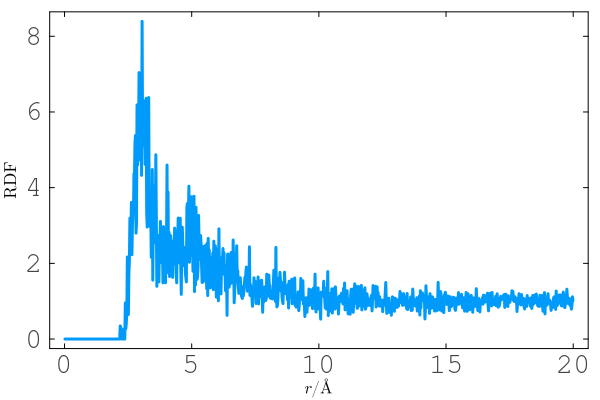

In [ ]:
plot(layout=(1, 1))
# plot mddf
plot!(results_sbt.d, results_sbt.rdf,
    xlabel=L"r/\AA",
    ylabel="RDF",
    tickfont=font(15, "Arial",:bold),
    subplot=1
)

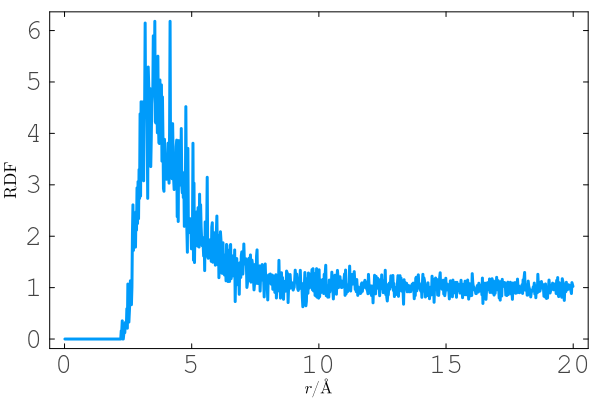

In [33]:
plot(layout=(1, 1))
# plot mddf
plot!(results_2sbt.d, results_2sbt.rdf,
    xlabel=L"r/\AA",
    ylabel="RDF",
    tickfont=font(15, "Arial",:bold),
    subplot=1
)

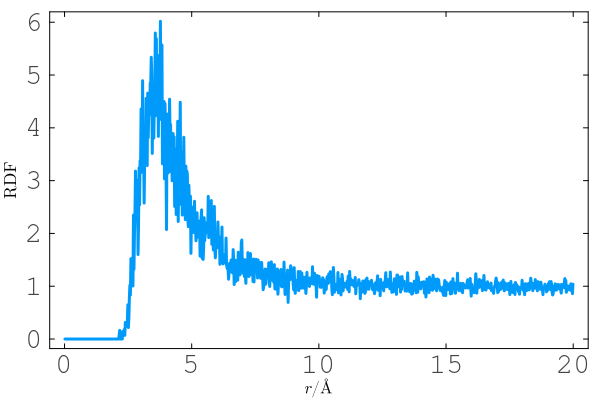

In [39]:
plot(layout=(1, 1))
# plot mddf
plot!(results_4sbt.d, results_4sbt.rdf,
    xlabel=L"r/\AA",
    ylabel="RDF",
    tickfont=font(15, "Arial",:bold),
    subplot=1
)

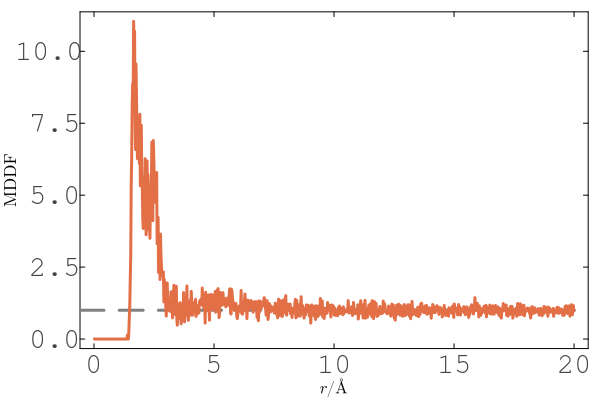

In [16]:
plot(layout=(1, 1))
hline!([1], linestyle=:dash, linecolor=:gray, subplot=1)

# plot mddf
plot!(results_sbt.d, results_sbt.mddf,
    xlabel=L"r/\AA",
    ylabel="MDDF",
    tickfont=font(15, "Arial",:bold),
    subplot=1
)

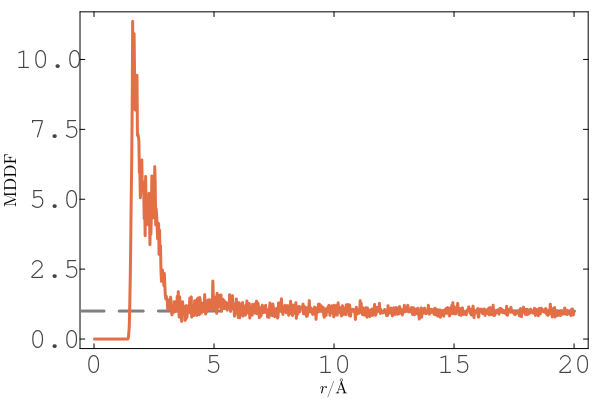

In [34]:
plot(layout=(1, 1))
hline!([1], linestyle=:dash, linecolor=:gray, subplot=1)

# plot mddf
plot!(results_2sbt.d, results_2sbt.mddf,
    xlabel=L"r/\AA",
    ylabel="MDDF",
    tickfont=font(15, "Arial",:bold),
    subplot=1
)

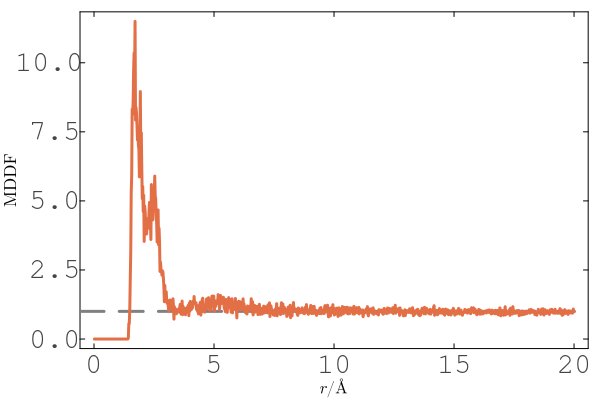

In [40]:
plot(layout=(1, 1))
hline!([1], linestyle=:dash, linecolor=:gray, subplot=1)

# plot mddf
plot!(results_4sbt.d, results_4sbt.mddf,
    xlabel=L"r/\AA",
    ylabel="MDDF",
    tickfont=font(15, "Arial",:bold),
    subplot=1
)

In [17]:
# 
# Load PDB file of the system
atoms_mnt = readPDB("./system_24trp-1mnt.pdb")

# Select the protein and the GLYC molecules
protein_mnt = select(atoms_mnt, "resname TRP")
mannitol = select(atoms_mnt, "resname MNT")
water = select(atoms_mnt, "resname SOL")


   Vector{Atom{Nothing}} with 39990 atoms with fields:
   index name resname chain   resnum  residue        x        y        z occup  beta model segname index_pdb
     675   OW     SOL     X       26       26   36.450   41.670   28.440  1.00  0.00     1       X       675
     676  HW1     SOL     X       26       26   35.670   41.120   28.470  1.00  0.00     1       X       676
     677  HW2     SOL     X       26       26   36.740   41.730   29.350  1.00  0.00     1       X       677
                                                       ⋮ 
   40662   OW     SOL     X     3355    13355   11.740   10.040   12.880  1.00  0.00     1       X     40662
   40663  HW1     SOL     X     3355    13355   10.820   10.170   13.110  1.00  0.00     1       X     40663
   40664  HW2     SOL     X     3355    13355   11.730    9.350   12.220  1.00  0.00     1       X     40664

In [41]:
# 
# Load PDB file of the system
atoms_mnt = readPDB("./system_24trp-2mnt.pdb")

# Select the protein and the GLYC molecules
protein_mnt = select(atoms_mnt, "resname TRP")
mannitol = select(atoms_mnt, "resname MNT")
water = select(atoms_mnt, "resname SOL")


   Vector{Atom{Nothing}} with 39951 atoms with fields:
   index name resname chain   resnum  residue        x        y        z occup  beta model segname index_pdb
     701   OW     SOL     X       27       27   54.240   24.300   57.180  1.00  0.00     1       X       701
     702  HW1     SOL     X       27       27   54.900   24.340   57.860  1.00  0.00     1       X       702
     703  HW2     SOL     X       27       27   53.420   24.530   57.620  1.00  0.00     1       X       703
                                                       ⋮ 
   40649   OW     SOL     X     3343    13343    4.880   41.710   27.500  1.00  0.00     1       X     40649
   40650  HW1     SOL     X     3343    13343    3.960   41.810   27.220  1.00  0.00     1       X     40650
   40651  HW2     SOL     X     3343    13343    5.170   42.600   27.700  1.00  0.00     1       X     40651

In [45]:
# 
# Load PDB file of the system
atoms_mnt = readPDB("./system_24trp-4mnt.pdb")

# Select the protein and the GLYC molecules
protein_mnt = select(atoms_mnt, "resname TRP")
mannitol = select(atoms_mnt, "resname MNT")
water = select(atoms_mnt, "resname SOL")

   Vector{Atom{Nothing}} with 39936 atoms with fields:
   index name resname chain   resnum  residue        x        y        z occup  beta model segname index_pdb
     753   OW     SOL     X       29       29   26.200   11.650   36.100  1.00  0.00     1       X       753
     754  HW1     SOL     X       29       29   25.990   11.930   35.210  1.00  0.00     1       X       754
     755  HW2     SOL     X       29       29   26.230   10.700   36.050  1.00  0.00     1       X       755
                                                       ⋮ 
   40686   OW     SOL     X     3340    13340   26.940   21.400   72.030  1.00  0.00     1       X     40686
   40687  HW1     SOL     X     3340    13340   26.520   20.600   71.700  1.00  0.00     1       X     40687
   40688  HW2     SOL     X     3340    13340   27.220   21.870   71.250  1.00  0.00     1       X     40688

In [18]:
# Setup solute and solvent structures
solute = AtomSelection(protein_sbt, nmols=24)
cosolute = AtomSelection(mannitol, nmols=1)
solvent_h2o = AtomSelection(water, nmols=13330)

# Path to the trajectory file
trajectory_file1 = "./traj_resp-24trp-1mnt.dcd"

# Run mddf calculation, and save results
trajectory_mnt = Trajectory(trajectory_file1, cosolute, solute)
results_mnt = mddf(trajectory_mnt, Options(bulk_range=(10.0, 20.0)))
save(results_mnt, "trp-1mnt_resp.json")
println("Results saved to trp-8mnt_results.json")

#
# Produce plots
#
# Default options for plots 
Plots.default(
    fontfamily="Computer Modern",
    linewidth=3,
    framestyle=:box,
    label=nothing,
    grid=false
)


# # Run mddf calculation, and save results
# trajectory_wat1 = Trajectory(trajectory_file1,solute, solvent_h2o)
# results_wat1 = mddf(trajectory_wat1, Options(bulk_range=(10.0, 20.0)))
# save(results_wat1, "trp-8mnt-wat_results.json")
# println("Results saved to trp-8sbt_results.json")

--------------------------------------------------------------------------------
Initializing data structures ...
Open trajectory and read first frame ...
 
--------------------------------------------------------------------------------
Starting MDDF calculation in parallel:
10001 frames will be considered.
Number of calculation threads: 8
Solute: 26 atoms belonging to 1 molecule.
Solvent: 648 atoms belonging to 24 molecules.


Progress: 100%|█████████████████████████████████████████| Time: 0:00:08


--------------------------------------------------------------------------------
Results saved to trp-8mnt_results.json


┌ Warning: 
│ 
│     Ideal-gas histogram bins with zero samples. 
│     Increase n_random_samples, number of trajectory frames, and/or bin size.
│ 
└ @ ComplexMixtures


In [42]:
# Setup solute and solvent structures
solute = AtomSelection(protein_sbt, nmols=24)
cosolute = AtomSelection(mannitol, nmols=2)
solvent_h2o = AtomSelection(water, nmols=13317)

# Path to the trajectory file
trajectory_file1 = "./traj_resp-24trp-2mnt.dcd"

# Run mddf calculation, and save results
trajectory_2mnt = Trajectory(trajectory_file1, cosolute, solute)
results_2mnt = mddf(trajectory_2mnt, Options(bulk_range=(10.0, 20.0)))
save(results_2mnt, "trp-2mnt_resp.json")
println("Results saved to trp-8mnt_results.json")

#
# Produce plots
#
# Default options for plots 
Plots.default(
    fontfamily="Computer Modern",
    linewidth=3,
    framestyle=:box,
    label=nothing,
    grid=false
)


# # Run mddf calculation, and save results
# trajectory_wat1 = Trajectory(trajectory_file1,solute, solvent_h2o)
# results_wat1 = mddf(trajectory_wat1, Options(bulk_range=(10.0, 20.0)))
# save(results_wat1, "trp-8mnt-wat_results.json")
# println("Results saved to trp-8sbt_results.json")

--------------------------------------------------------------------------------
Initializing data structures ...
Open trajectory and read first frame ...
 
--------------------------------------------------------------------------------
Starting MDDF calculation in parallel:
10001 frames will be considered.
Number of calculation threads: 8
Solute: 52 atoms belonging to 2 molecules.
Solvent: 648 atoms belonging to 24 molecules.


Progress: 100%|█████████████████████████████████████████| Time: 0:00:09


--------------------------------------------------------------------------------
Results saved to trp-8mnt_results.json


┌ Warning: 
│ 
│     Ideal-gas histogram bins with zero samples. 
│     Increase n_random_samples, number of trajectory frames, and/or bin size.
│ 
└ @ ComplexMixtures


In [46]:
# Setup solute and solvent structures
solute = AtomSelection(protein_sbt, nmols=24)
cosolute = AtomSelection(mannitol, nmols=4)
solvent_h2o = AtomSelection(water, nmols=13312)

# Path to the trajectory file
trajectory_file1 = "./traj_resp-24trp-4mnt.dcd"

# Run mddf calculation, and save results
trajectory_4mnt = Trajectory(trajectory_file1, cosolute, solute)
results_4mnt = mddf(trajectory_4mnt, Options(bulk_range=(10.0, 20.0)))
save(results_4mnt, "trp-4mnt_resp.json")
println("Results saved to trp-8mnt_results.json")

#
# Produce plots
#
# Default options for plots 
Plots.default(
    fontfamily="Computer Modern",
    linewidth=3,
    framestyle=:box,
    label=nothing,
    grid=false
)

--------------------------------------------------------------------------------
Initializing data structures ...
Open trajectory and read first frame ...
 
--------------------------------------------------------------------------------
Starting MDDF calculation in parallel:
10001 frames will be considered.
Number of calculation threads: 8
Solute: 104 atoms belonging to 4 molecules.
Solvent: 648 atoms belonging to 24 molecules.


Progress: 100%|█████████████████████████████████████████| Time: 0:00:11


--------------------------------------------------------------------------------
Results saved to trp-8mnt_results.json


┌ Warning: 
│ 
│     Ideal-gas histogram bins with zero samples. 
│     Increase n_random_samples, number of trajectory frames, and/or bin size.
│ 
└ @ ComplexMixtures


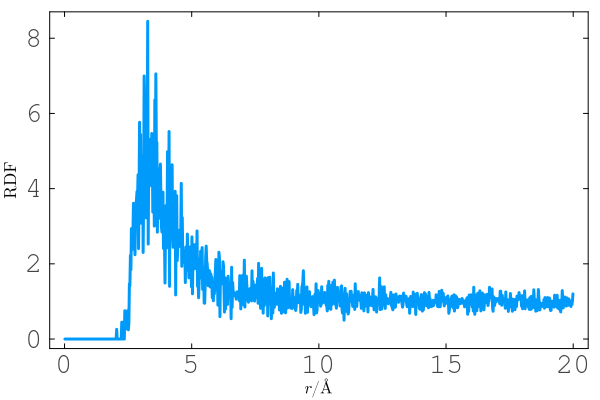

In [19]:
plot(layout=(1, 1))
# plot mddf
plot!(results_mnt.d, results_mnt.rdf,
    xlabel=L"r/\AA",
    ylabel="RDF",
    tickfont=font(15, "Arial",:bold),
    subplot=1
)

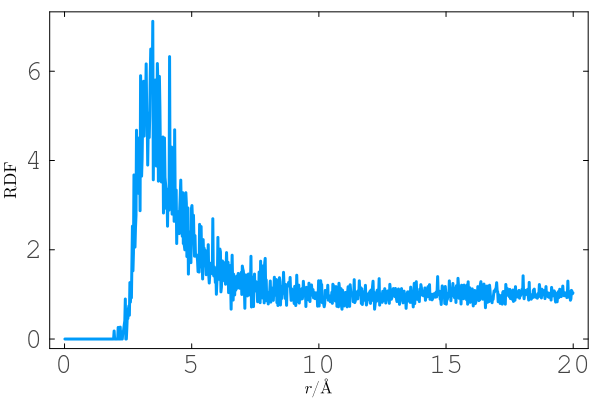

In [43]:
plot(layout=(1, 1))
# plot mddf
plot!(results_2mnt.d, results_2mnt.rdf,
    xlabel=L"r/\AA",
    ylabel="RDF",
    tickfont=font(15, "Arial",:bold),
    subplot=1
)

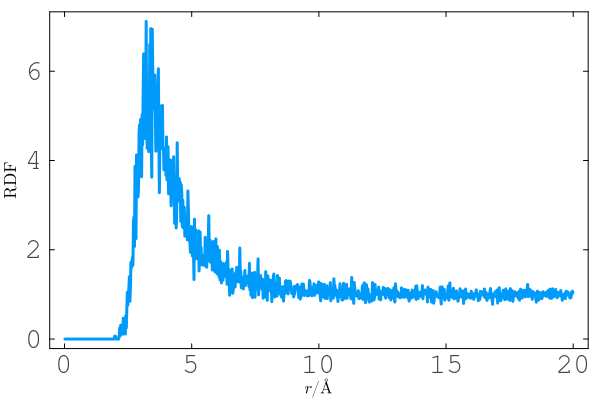

In [47]:
plot(layout=(1, 1))
# plot mddf
plot!(results_4mnt.d, results_4mnt.rdf,
    xlabel=L"r/\AA",
    ylabel="RDF",
    tickfont=font(15, "Arial",:bold),
    subplot=1
)

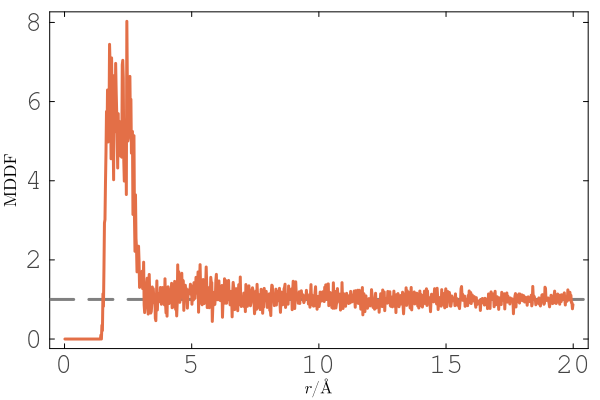

In [20]:
plot(layout=(1, 1))
hline!([1], linestyle=:dash, linecolor=:gray, subplot=1)

# plot mddf
plot!(results_mnt.d, results_mnt.mddf,
    xlabel=L"r/\AA",
    ylabel="MDDF",
    tickfont=font(15, "Arial",:bold),
    subplot=1
)

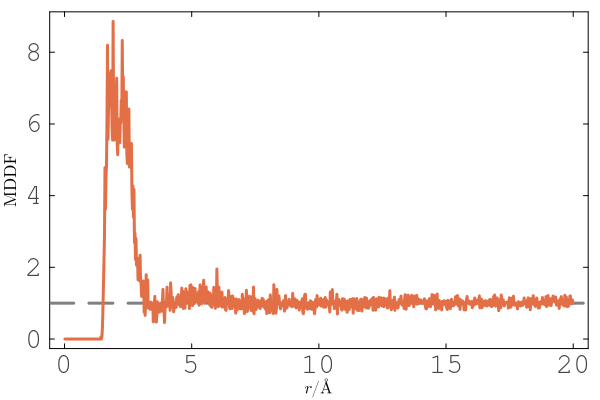

In [44]:
plot(layout=(1, 1))
hline!([1], linestyle=:dash, linecolor=:gray, subplot=1)

# plot mddf
plot!(results_2mnt.d, results_2mnt.mddf,
    xlabel=L"r/\AA",
    ylabel="MDDF",
    tickfont=font(15, "Arial",:bold),
    subplot=1
)

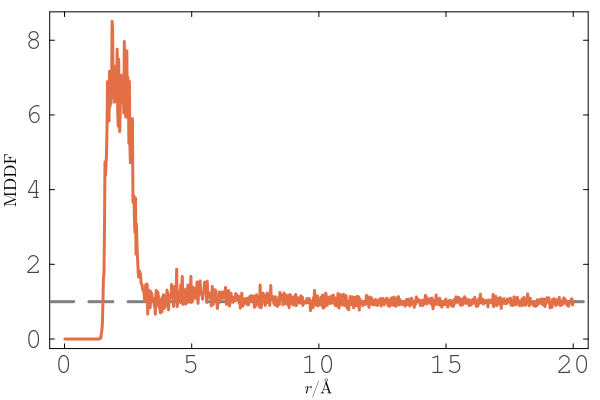

In [48]:
plot(layout=(1, 1))
hline!([1], linestyle=:dash, linecolor=:gray, subplot=1)

# plot mddf
plot!(results_4mnt.d, results_4mnt.mddf,
    xlabel=L"r/\AA",
    ylabel="MDDF",
    tickfont=font(15, "Arial",:bold),
    subplot=1
)

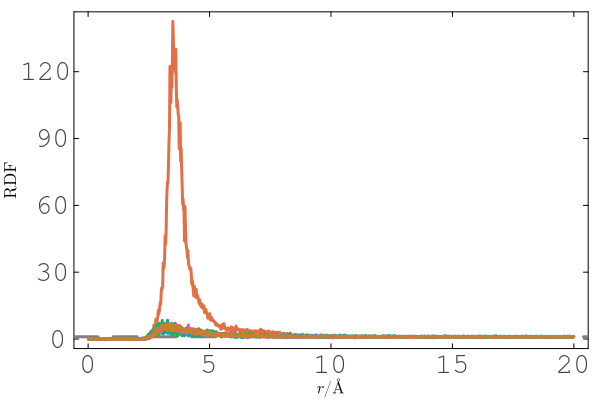

In [53]:
plot(layout=(1, 1))
hline!([1], linestyle=:dash, linecolor=:gray, subplot=1)

# plot rdf
plot!(results3.d, results3.rdf,
    xlabel=L"r/\AA",
    ylabel="RDF",
    tickfont=font(15, "Arial",:bold),
    subplot=1
)

# plot rdf
plot!(results_sbt.d, results_sbt.rdf,
    xlabel=L"r/\AA",
    ylabel="RDF",
    tickfont=font(15, "Arial",:bold),
    subplot=1
)

plot!(results_2sbt.d, results_2sbt.rdf,
    xlabel=L"r/\AA",
    ylabel="RDF",
    tickfont=font(15, "Arial",:bold),
    subplot=1
)
plot!(results_4sbt.d, results_4sbt.rdf,
    xlabel=L"r/\AA",
    ylabel="RDF",
    tickfont=font(15, "Arial",:bold),
    subplot=1
)

plot!(results_mnt.d, results_mnt.rdf,
    xlabel=L"r/\AA",
    ylabel="RDF",
    tickfont=font(15, "Arial",:bold),
    subplot=1
)

plot!(results_2mnt.d, results_2mnt.rdf,
    xlabel=L"r/\AA",
    ylabel="RDF",
    tickfont=font(15, "Arial",:bold),
    subplot=1
)

plot!(results_4mnt.d, results_4mnt.rdf,
xlabel=L"r/\AA",
ylabel="RDF",
tickfont=font(15, "Arial",:bold),
subplot=1
)




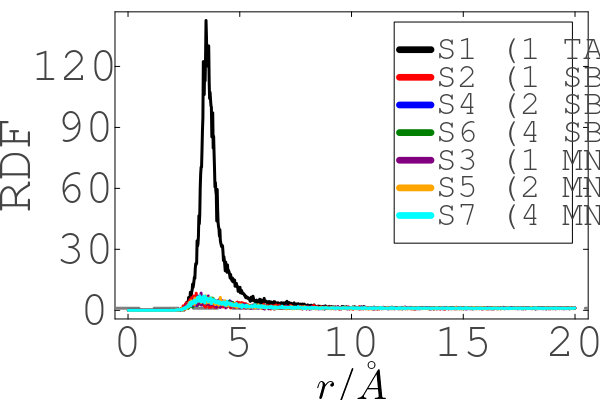

In [57]:
using Plots

# Set plot theme for publication-quality output
default(
    fontfamily="Times New Roman",
    titlefontsize=20,
    guidefontsize=28,
    tickfontsize=25,
    legendfontsize=18,
    linewidth=3,
    grid=false
)

# Define systems and their labels
systems = ["S0", "S1 (1TA)", "S2 (1SBT)", "S3 (1MNT)", 
           "S4 (2SBT)", "S5 (2MNT)", "S6 (4SBT)", "S7 (4MNT)"]

# Define colors for each system
colors = [:black, :red, :blue, :green, :purple, :orange, :cyan, :magenta]

# Create the plot
plt = plot(layout=(1, 1))

# Add a dashed horizontal reference line at RDF = 1
hline!([1], linestyle=:dash, linecolor=:gray, label="", subplot=1)

# Plot RDF data for each system
plot!(results3.d, results3.rdf, label="S1 (1 TA)", color=colors[1], subplot=1)
plot!(results_sbt.d, results_sbt.rdf, label="S2 (1 SBT)", color=colors[2], subplot=1)
plot!(results_2sbt.d, results_2sbt.rdf, label="S4 (2 SBT)", color=colors[3], subplot=1)
plot!(results_4sbt.d, results_4sbt.rdf, label="S6 (4 SBT)", color=colors[4], subplot=1)
plot!(results_mnt.d, results_mnt.rdf, label="S3 (1 MNT)", color=colors[5], subplot=1)
plot!(results_2mnt.d, results_2mnt.rdf, label="S5 (2 MNT)", color=colors[6], subplot=1)
plot!(results_4mnt.d, results_4mnt.rdf, label="S7 (4 MNT)", color=colors[7], subplot=1)

# Set labels and formatting
xlabel!(L"r/\AA")
ylabel!("RDF")
plot!(tickfont=font(25, "Times New Roman", :bold), legend=:topright)

# Show plot
display(plt)


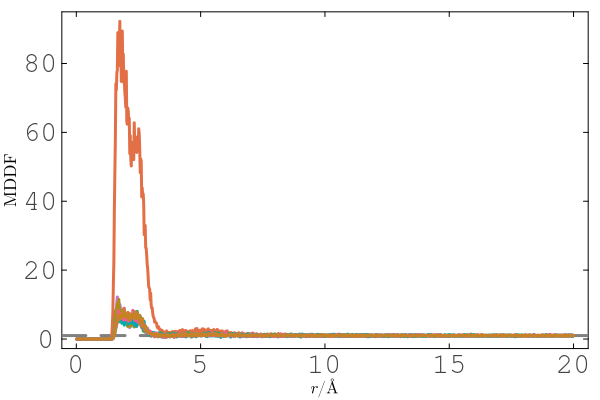

In [54]:
plot(layout=(1, 1))
hline!([1], linestyle=:dash, linecolor=:gray, subplot=1)

# plot mddf
plot!(results3.d, results3.mddf,
    xlabel=L"r/\AA",
    ylabel="MDDF",
    tickfont=font(15, "Arial",:bold),
    subplot=1
)



# plot mddf
plot!(results_sbt.d, results_sbt.mddf,
    xlabel=L"r/\AA",
    ylabel="MDDF",
    tickfont=font(15, "Arial",:bold),
    subplot=1
)

plot!(results_2sbt.d, results_2sbt.mddf,
    xlabel=L"r/\AA",
    ylabel="MDDF",
    tickfont=font(15, "Arial",:bold),
    subplot=1
)

plot!(results_4sbt.d, results_4sbt.mddf,
    xlabel=L"r/\AA",
    ylabel="MDDF",
    tickfont=font(15, "Arial",:bold),
    subplot=1
)

plot!(results_mnt.d, results_mnt.mddf,
    xlabel=L"r/\AA",
    ylabel="MDDF",
    tickfont=font(15, "Arial",:bold),
    subplot=1
)


plot!(results_2mnt.d, results_2mnt.mddf,
    xlabel=L"r/\AA",
    ylabel="MDDF",
    tickfont=font(15, "Arial",:bold),
    subplot=1
)


plot!(results_4mnt.d, results_4mnt.mddf,
    xlabel=L"r/\AA",
    ylabel="MDDF",
    tickfont=font(15, "Arial",:bold),
    subplot=1
)

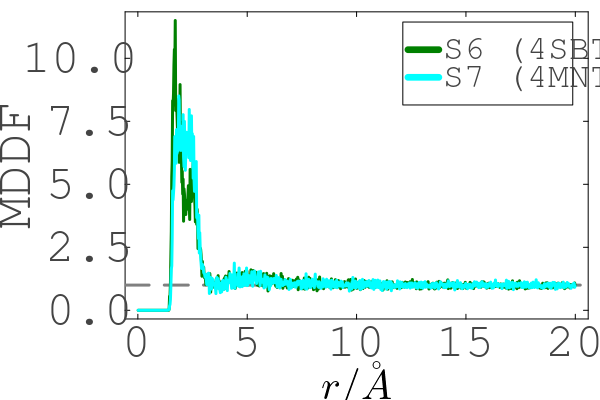

In [62]:
using Plots

# Set plot theme for publication-quality output
default(
    fontfamily="Times New Roman",
    titlefontsize=20,
    guidefontsize=28,
    tickfontsize=25,
    legendfontsize=18,
    linewidth=3,
    grid=false
)

# Define systems and their labels
systems = ["S0", "S1 (1TA)", "S2 (1SBT)", "S3 (1MNT)", 
           "S4 (2SBT)", "S5 (2MNT)", "S6 (4SBT)", "S7 (4MNT)"]

# Define colors for each system
colors = [:black, :red, :blue, :green, :purple, :orange, :cyan, :magenta]

# Create the plot
plt = plot(layout=(1, 1))

# Add a dashed horizontal reference line at MDDF = 1
hline!([1], linestyle=:dash, linecolor=:gray, label="", subplot=1)

# Plot MDDF data for each system
# plot!(results3.d, results3.mddf, label="S1 (1 TA)", color=colors[1], subplot=1)
# plot!(results_sbt.d, results_sbt.mddf, label="S2 (1SBT)", color=colors[2], subplot=1)
# plot!(results_2sbt.d, results_2sbt.mddf, label="S4 (2SBT)", color=colors[3], subplot=1)
plot!(results_4sbt.d, results_4sbt.mddf, label="S6 (4SBT)", color=colors[4], subplot=1)
# plot!(results_mnt.d, results_mnt.mddf, label="S3 (1MNT)", color=colors[5], subplot=1)
# plot!(results_2mnt.d, results_2mnt.mddf, label="S5 (2MNT)", color=colors[6], subplot=1)
plot!(results_4mnt.d, results_4mnt.mddf, label="S7 (4MNT)", color=colors[7], subplot=1)

# Set labels and formatting
xlabel!(L"r/\AA")
ylabel!("MDDF")
plot!(tickfont=font(25, "Times New Roman", :bold), legend=:topright)

# Show plot
display(plt)
